In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier  ## to build classification tree
from sklearn.tree import plot_tree  ## to draw the classification tree
from sklearn.model_selection import train_test_split  ## to split data into training and testing sets
from sklearn.model_selection import cross_val_score  ## for cross validation
from sklearn.metrics import confusion_matrix  ## to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix  ## to draw a confusion matrix

In [2]:
# importing the heart disease dataset from uci website

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
# giving the column names

df.columns = ['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']

In [5]:
df

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [6]:
# dataset schema/structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [8]:
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [9]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [10]:
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [11]:
# display dataset with missing value

df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [12]:
# since the dataset contains a total of 303 rows out of which only 6 rows have missing data hence,
# we can remove these missing data rows rather than imputing them.

df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]
df_no_missing

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [13]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [14]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [15]:
df_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    object 
 12  thal     297 non-null    object 
 13  hd       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [16]:
# splitting the data into dependent and independent variables

# X - data which we want to use to make predictions

X = df_no_missing.drop('hd', axis = 1).copy()  ## alternatively - X = df_no_missing.iloc[:,:-1]
X

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [17]:
# Y - data which we want to predict

Y = df_no_missing['hd'].copy()
Y

0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: hd, Length: 297, dtype: int64

## One - Hot Encoding

In [18]:
## The list below tells us that in X what each variable represents and the type of data (float or categorical) it should contain.

# age - float

# sex - category
# 0 = female
# 1 = male

# cp (chest pain) - category
# 1 = typical angina
# 2 = atypical angina
# 3 = non anginal pain
# 4 = asymptomatic

# restbp (resting blood pressure [in mm Hg]) - float

# chol (serum cholesterol in mg/dl) - float

# fbs (fasting blood sugar) - category
# 0 = >=120 mg/dl
# 1 = <120 mg/dl

# restecg (resting electrocardiographic result) - category
# 1 = normal
# 2 = having ST-T wave abnormality 
# 3 = showing probable or definite left ventricular hypertrophy 

# thalach (maximum heart rate achieved) - float

# exang (exercise induced angina) - category
# 0 = no
# 1 = yes

# oldpeak (ST depression induced byexercise relative to rest) - float

# slope (the slope of the peak exercise ST segment) - category
# 1 = upsloping
# 2 = flat
# 3 = downsloping

# ca (number of major vessels (0-3) colored by fluoroscopy) - float 

# thal (thalium heart scan) - category 
# 3 = normal (no cold spots)
# 6 = fixed defect (cold spots during rest and exercise)
# 7 = reversible defect (when cold spots only appear during exercise)

In [19]:
X.info()

# ie some of the colums that must have categorical data is currently having float (continuous data) 
# thus affecting the results of decision tree as it will try to find some kind of similarity among the continuous data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    object 
 12  thal     297 non-null    object 
dtypes: float64(11), object(2)
memory usage: 32.5+ KB


In [20]:
X['cp'].unique()

# cp contains only the values it ois suppposed to contain
# so we will convert it using one hot encoding, into a series of columns that only contains 0s and 1s

array([1., 4., 3., 2.])

In [21]:
# there are different ways to do one hot encoding, two of them are :
# ColumnTransformer() (from scikit-learn) & get_dummies() (from pandas)
# each has its own pros and cons

# here we will use get_dummies to do the one hot encoding
# first we will examine how get_dummies work

pd.get_dummies(X, columns=['cp'])

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,0,0,0,1
298,45.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,0,0,0
299,68.0,1.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,0,0,0,1
300,57.0,1.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,0,0,0,1


In [22]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])
X_encoded

# since other categorical columns ('sex', 'fbs', 'exang') only have two categories ie 0s and 1s so we dont need to encode that columns

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,0,...,1,1,0,0,0,1,0,0,0,1
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,1,...,0,1,0,0,0,1,0,0,0,1
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,0,...,1,1,0,0,0,1,0,0,0,1
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,0,...,1,1,0,0,0,1,0,0,0,1


In [23]:
# Y doesn't just have 0s and 1s instead it has 5 different level of heart disease
# 0 = no heart disease
# 1-4 = different levels of heart disease

Y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [24]:
# in order to make a tree that does simple classification that only cares if someone has heart disease or not
# we will convert all numbers > 0 to 1

Y.loc[Y > 0] = 1
Y.unique()

## Now we finally finished formatting the data for the Classification tree 

array([0, 1], dtype=int64)

## Building the Classification Tree

In [25]:
# split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, random_state=42)


# create a decision tree and fit it to the training data

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, Y_train)

[Text(0.5732758620689655, 0.9583333333333334, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.33189655172413796, 0.875, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.2025862068965517, 0.7916666666666666, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(0.14655172413793102, 0.7083333333333334, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.08620689655172414, 0.625, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No HD'),
 Text(0.05172413793103448, 0.5416666666666666, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No HD'),
 Text(0.034482758620689655, 0.4583333333333333, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No HD'),
 Text(0.017241379310344827, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No HD'),
 Text(0.05172413793103448, 0.375, 'exang <= 0.5\ngini = 0.

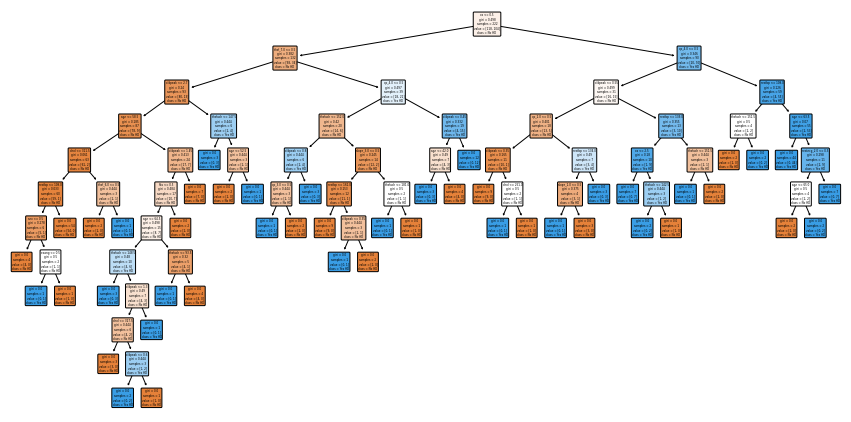

In [26]:
# plotting the tree

plt.figure(figsize = (15, 7.5))

plot_tree(clf_dt, filled = True, rounded = True, class_names = ['No HD', 'Yes HD'], feature_names = X_encoded.columns)

C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


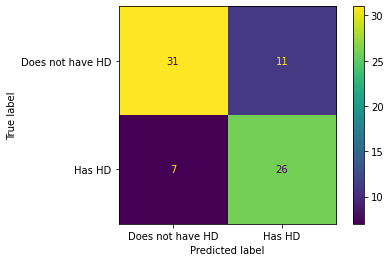

In [27]:
# plot_confusion_matrix will run the test data down the tree and draw a confusion matrix

plot_confusion_matrix(clf_dt, X_test, Y_test, display_labels = ['Does not have HD', 'Has HD'])

In [28]:
# from the above matrix it is seen that out of 42 people that dont have HD 31 were correctly classified not to have HD
# out of the 33 people that have HD 26 were correctly classified to have a HD

# model might have overfitted to the training data
# thus to get a better result of classification we need to prune the classification tree

## Cost Complexity Pruning Part 1 : Visualize Alpha 

In [29]:
# pruning is all about finding the right value for pruning parameter - alpha, which controls how much or how little pruning happens
# one way to find the optimul values for alpha is to plot the accuracy of the tree as a function of different values for alpha

# firstly, extract all the different values for alpha that are available for this tree, and build pruned tree for each value of alpha


path = clf_dt.cost_complexity_pruning_path(X_train, Y_train)  ## determine values for alpha
ccp_alphas = path.ccp_alphas  ## extract different values for alpha
ccp_alphas = ccp_alphas[:-1]  ## exclude the max value for alpha as it will prune all leaves leaving just the root

clf_dts = []  ## create empty array that will put all the decision trees into


# now create one DT per value for alpha and store it in the array

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train, Y_train)
    clf_dts.append(clf_dt)

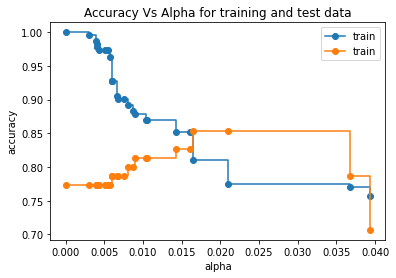

In [30]:
# comparing the accuracy of the trees using training data and testing data for different values of alpha

train_scores = [clf_dt.score(X_train, Y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, Y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy Vs Alpha for training and test data')
ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.legend()
plt.show()

In [31]:
# it is clear that the accuracy for test data hits max when alpha is about 0.016 after which accuracy for training data drops off
# value for alpha for classification tree goes from 0 to 1 as the gini score goes from 0 to 1
# value for alpha for regression tree may go from 0 to infinity as the sum of squared residuals may go from 0 to infinity

# now to examine whether we used the best training data or the best testing data we will use cross validation

## Cost Complexity Pruning Part 2 : Cross Validation for finding the best Alpha Value  

<AxesSubplot:xlabel='tree'>

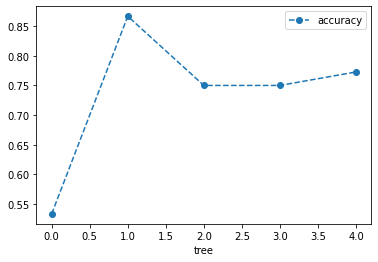

In [32]:
# for the above training and testing dataset the optimal value of alpha came out to be 0.016
# but different training and testing datasets results in trees with different accuracies for a particular alpha
# thus we will generate different training and testing datasets using cross validation and then train and test the trees with those datasets


clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.016)  ## create the tree with alpha = 0.016


# now using five fold cross validation, create five different testing and training datasets, and then use those to train and test the tree

scores = cross_val_score(clf_dt, X_train, Y_train, cv = 5)
df = pd.DataFrame(data = { 'tree' : range(5),
                          'accuracy' : scores
                         }
                 )
df.plot(x = 'tree', y = 'accuracy', marker = 'o', linestyle = '--')

<AxesSubplot:xlabel='alpha'>

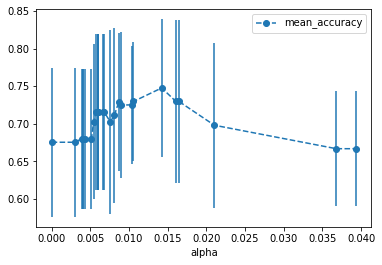

In [34]:
# create an array to store the results of each fold during cross validation

alpha_loop_values = []


# for each alpha value we will run five fold cross validation
# then store the mean and std dev of the scores (accuracies) for each call to cross_val_score in alpha_loop_values


for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, Y_train, cv = 5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    

# now we can plot a graph of the mean and std dev of the scores for each alpha value

alpha_results = pd.DataFrame(alpha_loop_values, columns = ['alpha', 'mean_accuracy', 'std_dev'])

alpha_results.plot(x = 'alpha',
                   y = 'mean_accuracy',
                   yerr = 'std_dev',
                   marker = 'o',
                   linestyle = '--')

In [35]:
# hence it is seen that instead of using alpha = 0.016 we must choose a value something around 0.014 and the exact value can be found by :

alpha_results.loc[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std_dev
20,0.014225,0.747778,0.091395


In [36]:
ideal_ccp_alpha = alpha_results.loc[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [37]:
# convert ideal_ccp_alpha from series to float

ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

## Building, Evaluating, Drawing and Interpreting the Final Classification Tree

In [38]:
# build and train the new classification tree by using the ideal alpha value

clf_dt_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha = ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, Y_train)

C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


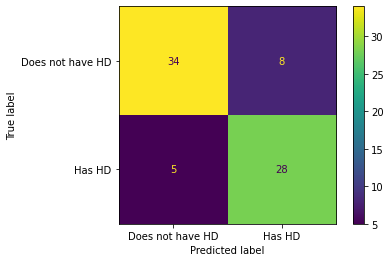

In [39]:
# confusion matrix to see if the pruned tree does better

plot_confusion_matrix(clf_dt_pruned, X_test, Y_test, display_labels = ['Does not have HD', 'Has HD'])

In [40]:
# from the above matrix it is seen that out of 42 people that dont have HD 34 were correctly classified not to have HD
# out of the 33 people that have HD 28 were correctly classified to have a HD

# thus the pruned tree is better than the full sized tree for the classification

[Text(0.5769230769230769, 0.875, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.3076923076923077, 0.625, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.15384615384615385, 0.375, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(0.07692307692307693, 0.125, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.23076923076923078, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Yes HD'),
 Text(0.46153846153846156, 0.375, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Yes HD'),
 Text(0.38461538461538464, 0.125, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No HD'),
 Text(0.5384615384615384, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Yes HD'),
 Text(0.8461538461538461, 0.625, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Yes HD'),
 Text(0.7692307692307693, 0.375, 'oldpeak <= 0.5

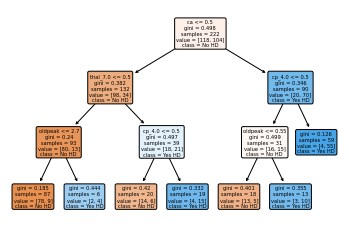

In [41]:
# drawing the pruned tree and interpreting it

plot_tree(clf_dt_pruned, filled = True, rounded = True, class_names = ['No HD', 'Yes HD'], feature_names = X_encoded.columns)

In [42]:
## each node contains :

# variable (column name) and the threshold for splitting the observations. Eg - for tree root observ with ca <= 0.5 goes to left and those with ca > 0.5 goes to right
# gini is the gini index for that node
# samples tells us how many samples are in that node
# values tells us how many samples in the node are in each category, no HD count comes before Yes HD count due to alphabetical order
# class tells us whichever category is represented the most in the node
# leaves are just like nodes, except they do not contain variable and threshold for splitting the observations
# nodes and leaves are colored by the dominant class in that node/leaf, and color intensity increased with low gini score